# Movies 3

## Introduction

Une base de données (hébergée dans le cloud AWS) contenant un certain nombre de données cinématographiques vous est fournie pour exploration et mise en pratique des langages SQL et Python.  
Les données de connexion (user, host) sont indiquées dans le brief, le mot de passe nécessaire est précisé en session par le formateur.  


## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

### Détail Tables de la base de donées movies :

#### La base de données comporte 4 tables :
    - movies
    - roles
    - artists
    - countries
    
#### Infos table movies :
    - 233 Enregistrements
    - 7 Colonnes : id (int), title (Varchar), year (int), directorId (int), genre (Varchar), summary (Text), countrycode (Varchar)
    - Clé primaire : id
    - Relations Clés étrangères avec 3 tables roles, artists et countries : 
    id ---> roles.movieId
    directorId ---> roles.actorId, artists.id
    countrycode ---> countries.code

#### Infos table roles :
    - 1340 Enregistrements
    - 3 Colonnes : movieId (int), actorId (int), character (Varchar)
    - Clés primaires : movieId, actorId
    - Relations Clés étrangères avec 2 tables movies et artists : 
    movieId ---> movies.id
    actorId ---> movies.directorId, artists.id

#### Infos table artists :
    - 1094 Enregistrements
    - 4 Colonnes : id (int), lastname (Varchar), firstname (Varchar), birthyear (int)
    - Clé primaire : id
    - Relations Clés étrangères avec 2 tables movies et roles : 
    id ---> movies.directorId, roles.actorId

#### Infos table countries :
    - 23 Enregistrements
    - 3 Colonnes : code (Varchar), name (Varchar), language (Varchar)
    - Clé primaire : code
    - Relations Clés étrangères avec la table movies : 
    code ---> movies.countrycode

### Schéma relationnel des tables de la base de données movies :

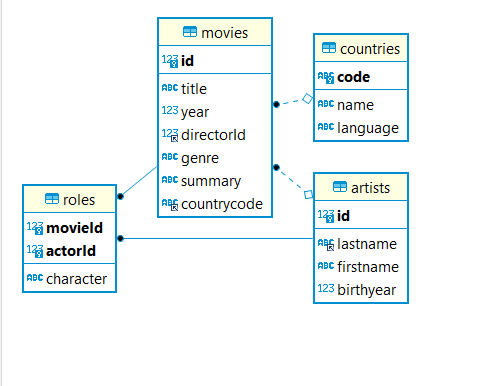

In [1]:
from IPython.display import Image
Image("ER-Diagram.png")

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [2]:
import os
import pandas as pd

In [3]:
from sqlalchemy import create_engine
import pymysql

In [4]:
# paramètres de connexion à la base de données movies (MySQL sous AWS RDS)
user = os.environ.get('movies3_user')
password = os.environ.get('movies3_psw') 
host = os.environ.get('movies3_host')  
port = 3306
dbname = 'movies'  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")

### Exemples

#### Tables de base

In [5]:
movies = pd.read_sql_query("SELECT * FROM movies LIMIT 10", engine)
movies.head()

,id,title,year,directorId,genre,summary,countrycode
0,11,La Guerre des étoiles,1977,1,Aventure,"Il y a bien longtemps, dans une galaxie très l...",US
1,24,Kill Bill : Volume 1,2003,138,Action,Au cours d'une cérémonie de mariage en plein d...,US
2,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
3,33,Impitoyable,1992,190,Western,"Après avoir été un impitoyable tueur, toujours...",US
4,38,Eternal Sunshine of the Spotless Mind,2004,201,Science-Fiction,Joël et Clémentine ne voient plus que les mauv...,US


In [6]:
artists = pd.read_sql_query("SELECT * FROM artists LIMIT 10", engine)
artists.head()

,id,lastname,firstname,birthyear
0,1,Lucas,George,1944
1,2,Hamill,Mark,1951
2,3,Ford,Harrison,1942
3,4,Fisher,Carrie,1956
4,5,Cushing,Peter,1913


In [7]:
roles = pd.read_sql_query("SELECT * FROM roles LIMIT 10", engine)
roles.head()

,movieId,actorId,character
0,11,2,Luke Skywalker
1,1891,2,Luke Skywalker
2,1892,2,Luke Skywalker
3,181808,2,Luke Skywalker / Dobbu Scay (voice)
4,11,3,Han Solo


In [8]:
countries = pd.read_sql_query("SELECT * FROM countries LIMIT 10", engine)
countries.head()

,code,name,language
0,AU,Australia,
1,BE,Belgium,
2,BS,Bahamas,
3,CA,Canada,
4,CN,China,


#### Autre requête simple
#### Q00: Nom et année de naissance des artistes nés après 1975 ? Combien sont-ils ?

In [9]:
sql_query_00 = """
    SELECT *
    FROM artists
    WHERE birthyear > 1975
"""

results = pd.read_sql_query(sql_query_00, engine)
results.head(5)

,id,lastname,firstname,birthyear
0,131,Gyllenhaal,Jake,1980
1,205,Dunst,Kirsten,1982
2,225,Holmes,Ashton,1978
3,258,García Bernal,Gael,1978
4,368,Witherspoon,Reese,1976


In [10]:
results.shape

(118, 4)

In [11]:
len(results)

118

### Questions

#### Q01: Quels sont les films de type 'Drame' ? Combien cela représente de films ?  

In [12]:
sql_query_01 = """
    SELECT title as 'Films_Genre_Drame'
    FROM movies
    WHERE genre = 'Drame'
"""

results = pd.read_sql_query(sql_query_01, engine)
results.head(5)

,Films_Genre_Drame
0,Apocalypse Now
1,A History of Violence
2,Match point
3,Le Secret de Brokeback Mountain
4,Breaking the Waves


In [13]:
len(results)

83

In [14]:
sql_query_01 = """
    SELECT COUNT(DISTINCT title) as 'Nb_Total_Films_Drame'
    FROM movies
    WHERE genre = 'Drame'
"""

results = pd.read_sql_query(sql_query_01, engine)
results.head(5)

,Nb_Total_Films_Drame
0,83


#### Q02: Quels rôles a joué Bruce Willis et dans quels films (triés par ordre chronologique) ?

In [15]:
sql_query_02 = """
    SELECT lastname AS 'Nom Acteur', firstname AS 'Prénom', Year AS 'Année Sortie', title AS 'Titre Film', `character` AS 'Rôle'
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE lastname = 'Willis'
    ORDER BY year;
"""

results = pd.read_sql_query(sql_query_02, engine)
results.head()

,Nom Acteur,Prénom,Année Sortie,Titre Film,Rôle
0,Willis,Bruce,1988,Piège de cristal,John McClane
1,Willis,Bruce,1990,58 minutes pour vivre,John McClane
2,Willis,Bruce,1994,Pulp Fiction,Butch Coolidge
3,Willis,Bruce,1995,Une Journée en enfer,John McClane
4,Willis,Bruce,2007,Die Hard 4 : Retour en enfer,John McClane


#### Q03: Qui est le réalisateur de Memento ?

In [16]:
sql_query_03 = """
    SELECT title AS 'Titre Film', lastname AS 'Nom', firstname AS 'Prénom', directorId AS 'Id Réalisateur'
    FROM movies
    INNER JOIN artists
        ON movies.directorId = artists.id
    WHERE title = 'Memento';
"""

results = pd.read_sql_query(sql_query_03, engine)
results.head(5)

,Titre Film,Nom,Prénom,Id Réalisateur
0,Memento,Nolan,Christopher,525


#### Q04: Qui a joué le rôle de Chewbacca et dans quels films ?

In [17]:
sql_query_04 = """
    SELECT title AS 'Titre Film', `character` AS 'Rôle', lastname AS 'Nom', firstname AS 'Prénom', actorId AS 'Id acteur'
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE `character` = 'Chewbacca';
"""

results = pd.read_sql_query(sql_query_04, engine)
results.head()

,Titre Film,Rôle,Nom,Prénom,Id acteur
0,La Guerre des étoiles,Chewbacca,Mayhew,Peter,24343
1,L'Empire contre-attaque,Chewbacca,Mayhew,Peter,24343
2,Le Retour du Jedi,Chewbacca,Mayhew,Peter,24343
3,Star Wars : Le Réveil de la Force,Chewbacca,Mayhew,Peter,24343
4,Star Wars : Les Derniers Jedi,Chewbacca,Suotamo,Joonas,1709041


#### Q05: Dans quels films Bruce Willis a-t-il joué le role de John McClane ? 

In [18]:
sql_query_05 = """
    SELECT title AS 'Titre Film', `character` AS 'Rôle', lastname AS 'Nom', firstname AS 'Prénom', actorId AS 'Id Acteur'
    FROM movies m
    INNER JOIN roles r
        ON m.id = r.movieId
    INNER JOIN artists a
        ON r.actorId = a.id
    WHERE lastname = 'Willis' AND `character` = 'John McClane';
"""

results = pd.read_sql_query(sql_query_05, engine)
results.head()

,Titre Film,Rôle,Nom,Prénom,Id Acteur
0,Piège de cristal,John McClane,Willis,Bruce,62
1,Die Hard 4 : Retour en enfer,John McClane,Willis,Bruce,62
2,Une Journée en enfer,John McClane,Willis,Bruce,62
3,58 minutes pour vivre,John McClane,Willis,Bruce,62


#### Q06: Quels sont les acteurs de 'Sueurs froides' ?

In [19]:
sql_query_06 = """
    SELECT title AS 'Titre Film', lastname AS 'Nom', firstname AS 'Prénom', actorId AS 'Id Acteur', directorId AS 'Id Directeur'
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE title = 'Sueurs froides';
"""

results = pd.read_sql_query(sql_query_06, engine)
results

,Titre Film,Nom,Prénom,Id Acteur,Id Directeur
0,Sueurs froides,Stewart,James,854,2636
1,Sueurs froides,Novak,Kim,5729,2636
2,Sueurs froides,Bel Geddes,Barbara,5730,2636


#### Q07: Quels sont les films dont le réalisateur est Tim Burton, et l’un des acteurs Jonnhy Depp ?

In [20]:
# A REVOIR
sql_query_07 = """
    SELECT *
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE lastname = 'Depp';
"""

results = pd.read_sql_query(sql_query_07, engine)
results

,id,title,year,directorId,genre,summary,countrycode,movieId,actorId,character,id,lastname,firstname,birthyear
0,2668,"Sleepy Hollow, La Légende du cavalier sans tête",1999,510,Drame,"En 1799, dans une bourgade de la Nouvelle-Angl...",DE,2668,85,Ichabod Crane,85,Depp,Johnny,1963


In [21]:
# A REVOIR
sql_query_07b = """
    SELECT title AS 'Titre Film'
    FROM ( SELECT artists.id AS Artiste, title, movies.id AS Idfilm
        FROM artists
        INNER JOIN movies 
            ON artists.id = movies.directorId
        WHERE lastname = "Burton") AS film_Burton
    INNER JOIN roles 
        ON film_Burton.Idfilm = roles.movieId 
    INNER JOIN artists 
        ON roles.actorId = artists.id
    WHERE lastname = "Depp";
"""

results = pd.read_sql_query(sql_query_07b, engine)
results

,Titre Film
0,"Sleepy Hollow, La Légende du cavalier sans tête"


#### Q08: Quels sont les films dans lesquels a joué Woody Allen ? Donnez aussi le rôle.

In [22]:
sql_query_08 = """
    SELECT title AS 'Titre Film', `character` AS 'Personnage', lastname AS 'Nom', firstname AS 'Prénom', actorId
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE lastname = 'Allen' AND firstname = 'Woody';
"""

results = pd.read_sql_query(sql_query_08, engine)
results

,Titre Film,Personnage,Nom,Prénom,actorId
0,Scoop,Sid Waterman,Allen,Woody,1243
1,Manhattan,Isaac Davis,Allen,Woody,1243
2,Annie Hall,Alvy Singer,Allen,Woody,1243
3,Maris et femmes,Prof. Gabriel 'Gabe' Roth,Allen,Woody,1243


#### Q09: Quel metteur en scène a tourné dans ses propres films ? Donnez le nom, le rôle et le titre des films en question.

In [23]:
sql_query_09 = """
    SELECT lastname AS 'Nom', firstname AS 'Prénom', title AS 'Titre Film', `character` AS 'Personnage', 
    directorId AS 'Id Réalisateur', actorId AS 'Id Acteur'
    FROM movies
    INNER JOIN roles
        ON movies.directorId = roles.actorId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE directorId = actorId;
"""

results = pd.read_sql_query(sql_query_09, engine)
results

,Nom,Prénom,Titre Film,Personnage,Id Réalisateur,Id Acteur
0,Tarantino,Quentin,Kill Bill : Volume 1,Mr. Brown,138,138
1,Tarantino,Quentin,Kill Bill : Volume 1,Jimmie Dimmick,138,138
2,Eastwood,Clint,Impitoyable,Bill Munny,190,190
3,Eastwood,Clint,Impitoyable,Blondie,190,190
4,Allen,Woody,Match point,Sid Waterman,1243,1243
...,...,...,...,...,...,...
88,Allen,Woody,Minuit à Paris,Alvy Singer,1243,1243
89,Allen,Woody,Minuit à Paris,Prof. Gabriel 'Gabe' Roth,1243,1243
90,Tarantino,Quentin,Django Unchained,Mr. Brown,138,138
91,Tarantino,Quentin,Django Unchained,Jimmie Dimmick,138,138


#### Q10: Quels sont les films de Quentin Tarantino dans lesquels il n’a pas joué 

In [24]:
# A REVOIR
sql_query_10 = """
    SELECT title AS Titre_Film
    FROM (
        SELECT movies.directorId AS Realisateur, title, movies.id AS Id_Film
        FROM movies
        INNER JOIN artists 
            ON movies.directorId = artists.id
        WHERE lastname = 'Tarantino'
        ) AS filmtarantino
    INNER JOIN roles 
        ON filmtarantino.Id_Film = roles.movieId 
    INNER JOIN artists 
        ON roles.actorId = artists.id
    WHERE Realisateur != Id_Film
    GROUP BY Id_Film;
"""
results = pd.read_sql_query(sql_query_10, engine)
results

,Titre_Film
0,Kill Bill : Volume 1
1,Jackie Brown
2,Kill Bill : Volume 2
3,Reservoir Dogs
4,Pulp Fiction
5,Inglourious Basterds
6,Django Unchained


#### Q11: Quel metteur en scène a tourné en tant qu’acteur ? Donner le nom, le rôle et le titre des films dans lesquels cet artiste a joué.

In [25]:
# A REVOIR
sql_query_11 = """
    SELECT Nom, Prenom, `character` as Rôle, title, Id_Réalisateur
    FROM (SELECT DISTINCT artists.id AS Id_Réalisateur, lastname AS Nom, firstname AS Prenom
        FROM artists 
        INNER JOIN movies 
            ON artists.id = movies.directorId) AS Liste_Réalisateur
    INNER JOIN roles 
        ON Liste_Réalisateur.Id_Réalisateur = roles.actorId
    INNER JOIN movies 
        ON roles.movieId = movies.id;
"""    
results = pd.read_sql_query(sql_query_11, engine)
results.head(10)

,Nom,Prenom,Rôle,title,Id_Réalisateur
0,Welles,Orson,Michael O'Hara,La Dame de Shanghai,40
1,Lang,Fritz,Himself,Le Mépris,68
2,Tarantino,Quentin,Mr. Brown,Reservoir Dogs,138
3,Tarantino,Quentin,Jimmie Dimmick,Pulp Fiction,138
4,Eastwood,Clint,Bill Munny,Impitoyable,190
5,Eastwood,Clint,Blondie,"Le Bon, la Brute et le Truand",190
6,Allen,Woody,Sid Waterman,Scoop,1243
7,Allen,Woody,Isaac Davis,Manhattan,1243
8,Allen,Woody,Alvy Singer,Annie Hall,1243
9,Allen,Woody,Prof. Gabriel 'Gabe' Roth,Maris et femmes,1243


#### Q12: Quels sont les films de Hitchcock sans James Stewart

In [26]:
sql_query_12 = """    
    SELECT title AS Titre_Film, lastname AS 'Nom', firstname AS 'Prenom', Id_Realisateur
    FROM (
        SELECT movies.directorId AS Id_Realisateur, title, movies.id AS Id_Film
        FROM movies
        INNER JOIN artists 
            ON movies.directorId = artists.id
        WHERE lastname = 'Hitchcock'
        ) AS Films_Hitchcock
    INNER JOIN roles 
        ON Films_Hitchcock.Id_Film = roles.movieId 
    INNER JOIN artists 
        ON roles.actorId = artists.id
    WHERE lastname != 'Stewart' AND firstname != 'James';
"""

results = pd.read_sql_query(sql_query_12, engine)
results.head()

,Titre_Film,Nom,Prenom,Id_Realisateur
0,La Mort aux trousses,Grant,Cary,2636
1,La Mort aux trousses,Marie Saint,Eva,2636
2,La Mort aux trousses,Landau,Martin,2636
3,La Mort aux trousses,G. Carroll,Leo,2636
4,Rebecca,Olivier,Laurence,2636


In [27]:
sql_query_12b = """    
    SELECT title AS Titre_Film
    FROM (
        SELECT movies.directorId AS Id_Realisateur, title, movies.id AS Id_Film
        FROM movies
        INNER JOIN artists 
            ON movies.directorId = artists.id
        WHERE lastname = 'Hitchcock'
        ) AS Films_Hitchcock
    INNER JOIN roles 
        ON Films_Hitchcock.Id_Film = roles.movieId 
    INNER JOIN artists 
        ON roles.actorId = artists.id
    WHERE lastname != 'Stewart' AND firstname != 'James'
    GROUP BY Titre_Film;
"""

results = pd.read_sql_query(sql_query_12b, engine)
results

,Titre_Film
0,La Mort aux trousses
1,Rebecca
2,Les Enchaînés
3,Sueurs froides
4,Psychose
5,Fenêtre sur cour
6,Les Oiseaux
7,L'homme qui en savait trop
8,L'Inconnu du Nord-Express
9,Soupçons


#### Q13: Quel est la filmographie de James Stewart ?

In [28]:
sql_query_13 = """
    SELECT title AS 'Titre Film', lastname AS 'Nom', firstname AS 'Prénom', actorId AS 'Id Acteur'
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE lastname = 'Stewart' AND firstname = 'James';
"""

results = pd.read_sql_query(sql_query_13, engine)
results

,Titre Film,Nom,Prénom,Id Acteur
0,Sueurs froides,Stewart,James,854
1,Fenêtre sur cour,Stewart,James,854
2,L'homme qui en savait trop,Stewart,James,854


#### Q14: Quels sont les films sans rôle (acteurs) ?

In [29]:
# A REVOIR
sql_query_14 = """
    SELECT *
    FROM movies
    INNER JOIN roles
        ON movies.directorId = roles.actorId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE `character` IS NULL;
"""

results = pd.read_sql_query(sql_query_14, engine)
results

,id,title,year,directorId,genre,summary,countrycode,movieId,actorId,character,id,lastname,firstname,birthyear


#### Q15: Combien d'acteurs n’ont jamais réalisé de film ? 

In [30]:
sql_query_15 = """
    SELECT COUNT(DISTINCT actorId) AS 'Nombre Acteurs'
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE NOT EXISTS (
        SELECT directorId
        FROM movies
        WHERE directorId = artists.id);
"""

results = pd.read_sql_query(sql_query_15, engine)
results

,Nombre Acteurs
0,986


#### Q16: Donnez les noms et prénoms des 10 réalisateurs les plus prolifiques, ainsi que le nombre de films qu’ils ont tournés ?

In [31]:
sql_query_16 = """
    SELECT COUNT(DISTINCT movies.id) AS Nombre_Films, firstname AS Prénom_Réalisateur, lastname AS Nom_Réalisateur
    FROM movies
    INNER JOIN artists
        ON movies.directorId = artists.id
    GROUP BY directorId
    HAVING COUNT(DISTINCT movies.id)
    ORDER BY Nombre_Films DESC
    LIMIT 10;
"""

results = pd.read_sql_query(sql_query_16, engine)
results

,Nombre_Films,Prénom_Réalisateur,Nom_Réalisateur
0,13,Steven,Spielberg
1,10,Alfred,Hitchcock
2,8,Woody,Allen
3,7,Quentin,Tarantino
4,7,Stanley,Kubrick
5,6,Christopher,Nolan
6,6,Ridley,Scott
7,6,Francis,Ford Coppola
8,6,Roman,Polanski
9,5,George,Lucas


#### Q17: Donnez les noms et prénoms des réalisateurs qui ont tourné au moins deux films. Combien sont-ils ?

In [32]:
sql_query_17 = """
    SELECT COUNT(DISTINCT movies.id) AS Nombre_Films, firstname AS Prénom_Réalisateur, lastname AS Nom_Réalisateur
    FROM movies
    INNER JOIN artists
        ON movies.directorId = artists.id
    GROUP BY directorId
    HAVING COUNT(DISTINCT movies.id) = 2
    ORDER BY Nombre_Films DESC;
"""

results = pd.read_sql_query(sql_query_17, engine)
results

,Nombre_Films,Prénom_Réalisateur,Nom_Réalisateur
0,2,David,Lynch
1,2,Michel,Hazanavicius
2,2,Abel,Ferrara
3,2,Patrice,Leconte
4,2,Bong,Joon-ho
5,2,Jacques,Audiard
6,2,J.J.,Abrams
7,2,Michael,Cimino
8,2,Ingmar,Bergman
9,2,Lars,von Trier


In [33]:
results.shape

(18, 3)

#### Q18: Dans quels films le réalisateur a-t-il le même prénom que l’un des interprètes ? (titre, nom du réalisateur, nom de l’interprète). Le réalisateur et l’interprète ne doivent pas être la même personne.

In [34]:
# A REVOIR
sql_query_18 = """
    SELECT m.title AS Titre_Film, a1.firstname AS Prenom_Acteur, a1.lastname AS Nom_Acteur, 
    a2.lastname AS Nom_Realisateur, a2.firstname AS Prénom_Réalisateur
    FROM roles r 
    INNER JOIN artists a1 
        ON r.actorId = a1.id 
    INNER JOIN movies m 
        ON r.movieId = m.id 
    INNER JOIN artists a2 
        ON m.directorId = a2.id
    WHERE a2.firstname = a1.firstname AND r.actorId != a2.id;
"""

results = pd.read_sql_query(sql_query_18, engine)
results.head()

,Titre_Film,Prenom_Acteur,Nom_Acteur,Nom_Realisateur,Prénom_Réalisateur
0,Volte/Face,John,Travolta,Woo,John
1,La Grande Illusion,Jean,Gabin,Renoir,Jean
2,Les demoiselles de Rochefort,Jacques,Perrin,Demy,Jacques
3,Les demoiselles de Rochefort,Jacques,Riberolles,Demy,Jacques
4,Broken Arrow,John,Travolta,Woo,John


#### Q19: Quels sont les 10 pays produisant le plus de films ?

In [35]:
sql_query_19 = """
    SELECT COUNT(DISTINCT movies.id) AS Nombre_Films, name AS Pays
    FROM movies
    INNER JOIN countries
        ON movies.countrycode = countries.code
    GROUP BY Pays
    HAVING COUNT(DISTINCT movies.id)
    ORDER BY Nombre_Films DESC
    LIMIT 5;
"""

results = pd.read_sql_query(sql_query_19, engine)
results

,Nombre_Films,Pays
0,131,Etats-Unis
1,39,France
2,21,Royaume-Uni
3,6,Canada
4,5,Allemagne


#### Q20: Quels sont les 5 acteurs ayant le plus joué dans des films français ?

In [36]:
sql_query_20 = """
    SELECT COUNT(DISTINCT movies.id) AS Nombre_Films, name AS Pays, lastname AS Nom, firstname AS Prénom
    FROM roles
    INNER JOIN artists
        ON roles.actorId = artists.id
    INNER JOIN movies
        ON roles.movieId = movies.id
    INNER JOIN countries
        ON movies.countrycode = countries.code
    WHERE name = 'France'
    GROUP BY artists.id
    ORDER BY Nombre_Films DESC
    LIMIT 5;
"""

results = pd.read_sql_query(sql_query_20, engine)
results

,Nombre_Films,Pays,Nom,Prénom
0,3,France,Deneuve,Catherine
1,3,France,Belmondo,Jean-Paul
2,3,France,Piccoli,Michel
3,2,France,Fresnay,Pierre
4,2,France,Lavanant,Dominique


---

## 3. Expression libre

A vous de jouer ! Tentez quelques requêtes de votre choix (avec pourquoi pas quelques graphiques illustratifs en utilisant Matplotlib...)